This workbook attempts to look at the gravity wave sensor outputs using Short Time Fourier Transform (STFT) strategies and then looking for peaks in the range of ~60 to 300Hz.  The signal used is known to have a gravity wave present.

In [1]:
import numpy as np

In [2]:
data = np.load('Data/00026119ef.npy')

In [3]:
data.shape

(3, 4096)

In [4]:
data

array([[-1.38262575e-20, -1.35904809e-20, -1.33615898e-20, ...,
        -1.71572540e-20, -1.66607269e-20, -1.64555469e-20],
       [-3.37462785e-21, -3.35331580e-21, -3.08772445e-21, ...,
        -2.78773771e-21, -2.32886115e-21, -1.81820287e-21],
       [ 6.81962503e-22,  7.34087620e-22,  7.71316317e-22, ...,
         1.66316417e-21,  1.88192133e-21,  1.60684897e-21]])

In [5]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [6]:
#sampling freq
fs = 2048

In [24]:
nperseg = 512
noverlap = 432
tmax = 48
tmin = 4
fmax = 45
fmin = 15


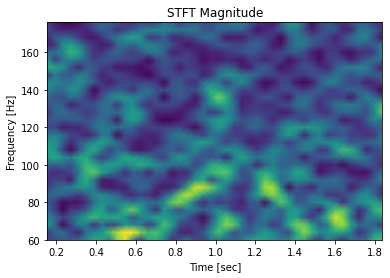

In [25]:
f, t, Zxx = signal.stft(data[0], fs, nperseg=nperseg, noverlap=noverlap)
plt.pcolormesh(t[tmin:tmax], f[fmin:fmax], np.abs(Zxx[fmin:fmax, tmin:tmax]), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

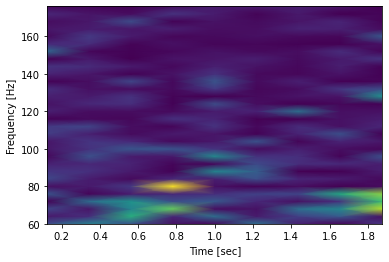

In [26]:
fsp, tsp, Sxx = signal.spectrogram(data[0], fs, nperseg=nperseg)
plt.pcolormesh(tsp, fsp[fmin:fmax], Sxx[fmin:fmax], shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

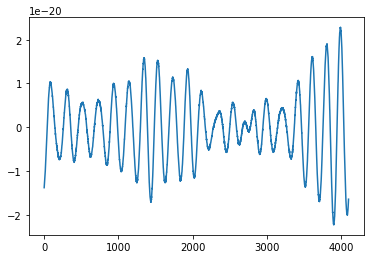

In [27]:
plt.plot(data[0])

In [28]:
print(f.shape)
f[15:75]

(257,)


array([ 60.,  64.,  68.,  72.,  76.,  80.,  84.,  88.,  92.,  96., 100.,
       104., 108., 112., 116., 120., 124., 128., 132., 136., 140., 144.,
       148., 152., 156., 160., 164., 168., 172., 176., 180., 184., 188.,
       192., 196., 200., 204., 208., 212., 216., 220., 224., 228., 232.,
       236., 240., 244., 248., 252., 256., 260., 264., 268., 272., 276.,
       280., 284., 288., 292., 296.])

In [29]:
print(t.shape)
t[75:950]

(53,)


array([], dtype=float64)

In [30]:
Zxx.shape

(257, 53)

In [31]:
print(fsp.shape)
print(tsp.shape)

(257,)
(9,)


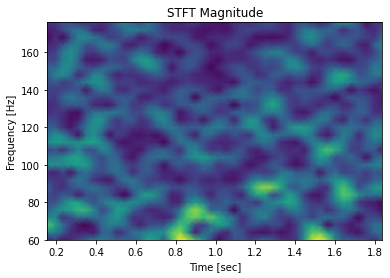

In [32]:
f2, t2, Zxx2 = signal.stft(data[1], fs, nperseg=nperseg, noverlap=noverlap)
plt.pcolormesh(t2[tmin:tmax], f2[fmin:fmax], np.abs(Zxx2[fmin:fmax, tmin:tmax]), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

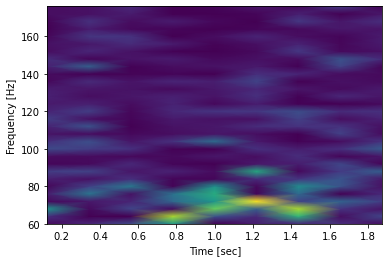

In [33]:
fsp2, tsp2, Sxx2 = signal.spectrogram(data[1], fs, nperseg=nperseg)
plt.pcolormesh(tsp2, fsp2[fmin:fmax], Sxx2[fmin:fmax], shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

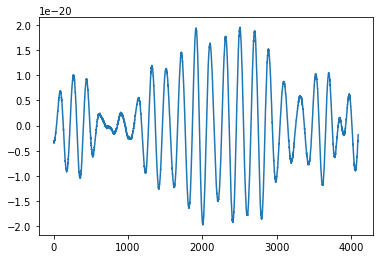

In [34]:
plt.plot(data[1])

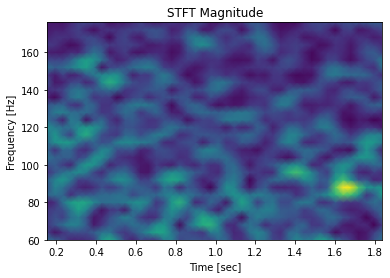

In [35]:
f3, t3, Zxx3 = signal.stft(data[2], fs, nperseg=nperseg, noverlap=noverlap)
plt.pcolormesh(t3[tmin:tmax], f3[fmin:fmax], np.abs(Zxx3[fmin:fmax, tmin:tmax]), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

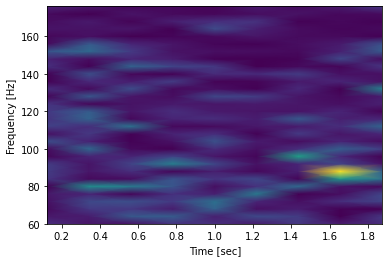

In [36]:
fsp3, tsp3, Sxx3 = signal.spectrogram(data[2], fs, nperseg=nperseg)
plt.pcolormesh(tsp3, fsp3[fmin:fmax], Sxx3[fmin:fmax], shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

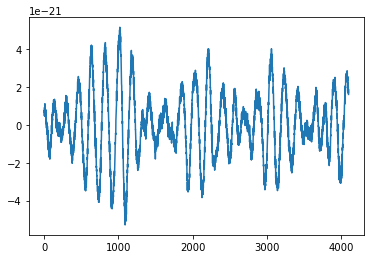

In [37]:
plt.plot(data[2])

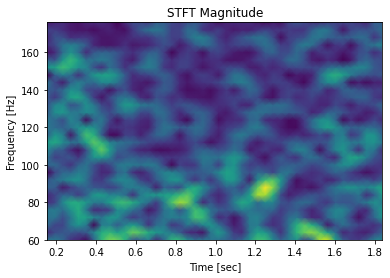

In [38]:
Zxx_fin = Zxx + Zxx2 + Zxx3
plt.pcolormesh(t[tmin:tmax], f[fmin:fmax], np.abs(Zxx_fin[fmin:fmax, tmin:tmax]), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

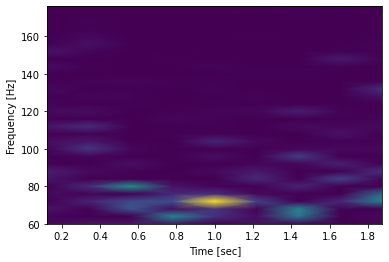

In [39]:
Sxx_fin = Sxx * Sxx2 * Sxx3
plt.pcolormesh(tsp, fsp[fmin:fmax], Sxx_fin[fmin:fmax], shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()